Il existe de nombreuses stratégies que vous pourriez envisager pour déterminer des conformations plus représentatives de vos clusters. Voici quelques suggestions :

- Analyse en Composantes Principales (ACP): L'ACP est une méthode de réduction de dimensionnalité qui peut être utile pour visualiser des données multidimensionnelles. Elle peut vous aider à comprendre les principales directions de variabilité dans vos données et à identifier des conformations qui sont représentatives de ces directions.

- Médoides de Clustering: Au lieu d'utiliser le centroïde d'un cluster (qui est la moyenne de tous les points dans le cluster), vous pourriez envisager d'utiliser le médoide, qui est le point du cluster le plus proche de tous les autres points. Cela peut être plus représentatif, surtout si vos données sont bruitées ou contiennent des valeurs aberrantes.

- Density-Based Spatial Clustering of Applications with Noise (DBSCAN) : DBSCAN est une méthode de clustering qui peut capturer des clusters de formes plus complexes que KMeans. Elle pourrait aider à identifier des conformations qui sont plus représentatives de la structure sous-jacente de vos données.

- Analyse de silhouette: L'analyse de silhouette peut être utilisée pour évaluer la qualité du clustering. Elle mesure à quel point chaque point est proche des points de son propre cluster par rapport aux points des autres clusters. Vous pouvez utiliser cette information pour identifier les points qui sont les plus représentatifs de leurs clusters.

- Sampling basé sur l'énergie: Dans certaines simulations de protéines, les conformations avec des énergies plus basses sont souvent plus représentatives de l'état naturel de la protéine. Vous pourriez envisager d'utiliser un échantillonnage basé sur l'énergie pour identifier ces conformations.

- Méthodes de clustering hiérarchique: Ces méthodes construisent un arbre de clusters, ce qui peut vous aider à comprendre comment les clusters se rapportent les uns aux autres à différents niveaux de granularité.

Rappelez-vous, le choix de la meilleure stratégie dépend de vos données spécifiques et de vos objectifs de recherche. Il est souvent utile d'expérimenter plusieurs approches et de comparer leurs résultats.

## Clustering Medoids:

Clustering medoids is a clustering technique similar to K-means, but it uses a different approach to determine the center of a cluster.

In K-means clustering, the center (or "centroid") of a cluster is defined as the mean of all the points within the cluster. In other words, for each dimension in the feature space, the mean of the values of that dimension for all the points in the cluster is calculated, and these means define the central point.

In medoid clustering, however, the center of a cluster is an actual point from the data set. The medoid is the point within the cluster whose sum of distances to all other points in the cluster is the smallest. In other words, it's the point that is the "closest" to all the other points in the cluster, if closeness is measured by Euclidean distance (or another distance measure you choose).

The advantage of using medoids is that they are more robust to outliers and noise. Because medoids are actual points from the data set, they are not as affected by outliers as the means are. That's why medoid clustering is often used when the data contain a lot of noise or outliers, or when the "average" of a group of points doesn't make sense or is not representative.

To provide a simple example, imagine that you have a cluster of points along a straight line. If a single point is far away from the others, the mean of all the points (the centroid) will be pulled towards that distant point. But the medoid will remain close to the line of points, as that's where most of the points are. Thus, the medoid might be a better representative of the cluster in this case.

In [23]:
import matplotlib.pyplot as plt
# Definition of default parameters for ticks and contour
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 14

In [11]:
import pandas as pd

# Load the data

data = pd.read_csv('/data/sritharan/Paris/Analyses_models/PCA/Final/file_name.csv')

# Display the first few rows of the dataframe
data.head()


,Unnamed: 0,eigenvector_1,eigenvector_2,md,size,marker,color,models
0,0,0.56984,0.34503,start-1,start,start,1,Rose
1,1,-0.95218,0.12071,1,frame,frame,1,Rose
2,2,-1.10430,0.12301,1,frame,frame,1,Rose
3,3,-3.22009,-1.05007,1,frame,frame,1,Rose
4,4,-3.18054,-0.59651,1,frame,frame,1,Rose


/ibpc/lumo/sritharan/.conda/envs/mdanalysis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/ibpc/lumo/sritharan/.conda/envs/mdanalysis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/ibpc/lumo/sritharan/.conda/envs/mdanalysis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/ibpc/lumo/sritharan/.conda/envs/mdanalysis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

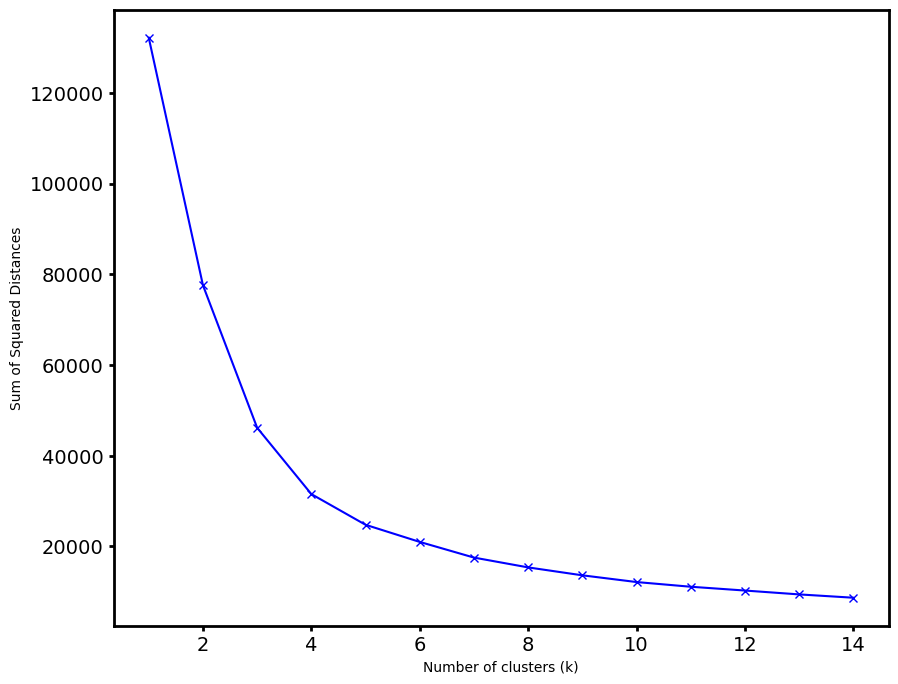

In [12]:
from sklearn.cluster import KMeans

# Prepare the feature matrix
X = data[['eigenvector_1', 'eigenvector_2']]

# List to hold the sum of squared distances
ssd = []

# We will check for 1 to 15 clusters
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X)
    ssd.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [13]:
from sklearn_extra.cluster import KMedoids
X = data[['eigenvector_1', 'eigenvector_2']]

# Assuming `X` is your data
kmedoids = KMedoids(n_clusters=5, random_state=0).fit(X)

# The medoid indices can be accessed as follows
medoid_indices = kmedoids.medoid_indices_

# The medoid (most representative) points can be accessed as follows
medoids = X.iloc[medoid_indices]


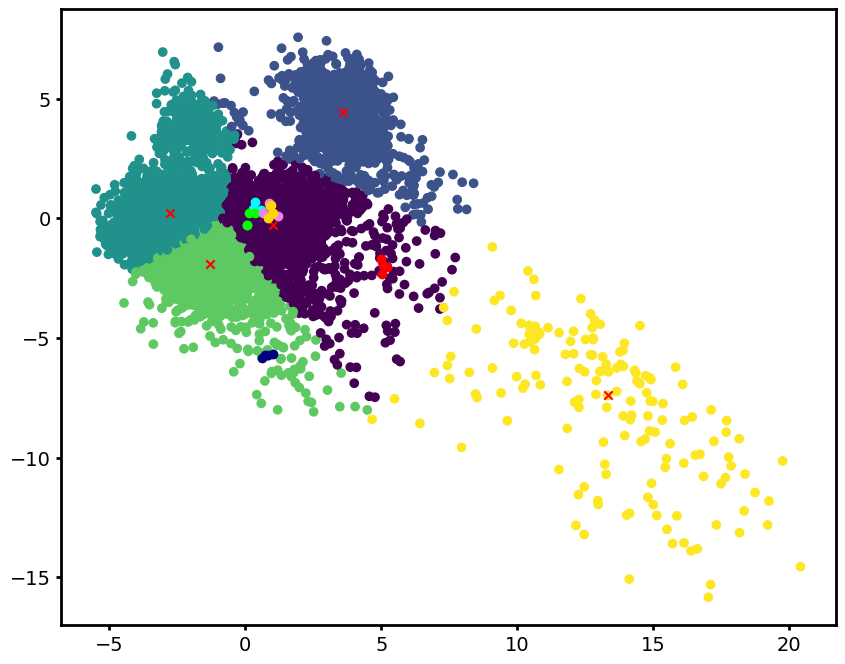

In [14]:
# Create a subset of the data that represents the starting points
start_points = data[data['size'].str.contains('start')]
# Get the cluster labels
labels = kmedoids.labels_
# Plot the clustering results
plt.figure(figsize=(10, 8))
plt.scatter(X['eigenvector_1'], X['eigenvector_2'], c=labels, cmap='viridis')

# Mark the medoids
plt.scatter(medoids['eigenvector_1'], medoids['eigenvector_2'], c='red', marker='x')

# Define the colors and categories
colors = ["aqua", "lime", "violet", "gold", "navy", "red"]
categories = start_points['models'].unique()

# Mark the starting points with different colors
for category, color in zip(categories, colors):
    plt.scatter(start_points[start_points['models'] == category]['eigenvector_1'], 
                start_points[start_points['models'] == category]['eigenvector_2'], 
                c=color, 
                label=category)

plt.savefig('Kmean_k5.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [15]:
medoid_frames = data.iloc[medoid_indices]
medoid_frames

,Unnamed: 0,eigenvector_1,eigenvector_2,md,size,marker,color,models
4518,4518,1.03214,-0.30211,16,frame,frame,16,ESM
1846,1846,3.59678,4.43789,7,frame,frame,7,TR
2272,2272,-2.76846,0.21651,8,frame,frame,8,TR
6450,6450,-1.30922,-1.92326,22,frame,frame,22,AF2
6726,6726,13.31729,-7.40725,23,frame,frame,23,AF2


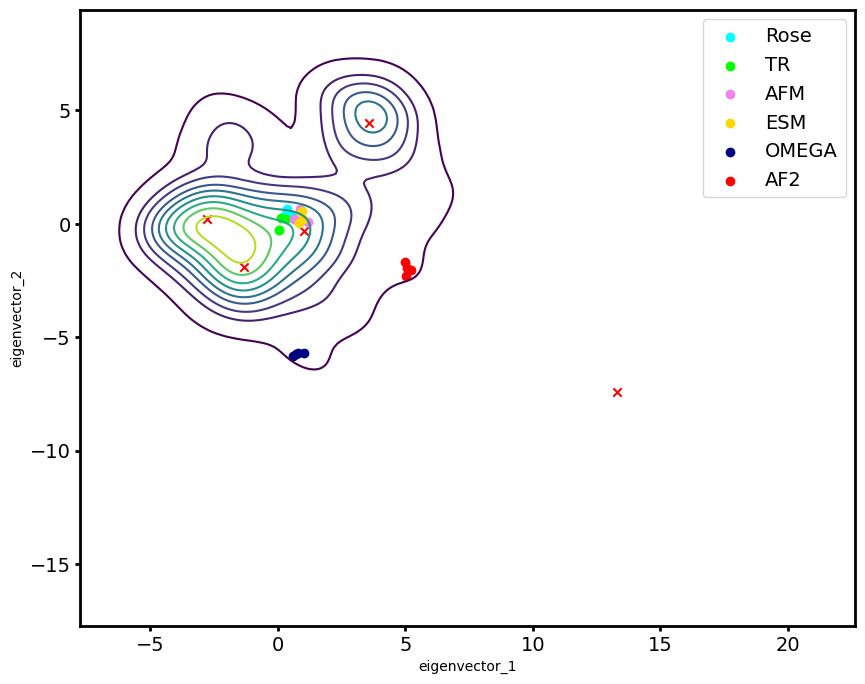

In [22]:
import seaborn as sns

# Create a new figure
plt.figure(figsize=(10, 8))


# Create the density plot
sns.kdeplot(data=X, x='eigenvector_1', y='eigenvector_2',fill=False, cmap='viridis', levels=10)

# Mark the medoids
plt.scatter(medoids['eigenvector_1'], medoids['eigenvector_2'], c='red', marker='x')

# Define the colors and categories
colors = ["aqua", "lime", "violet", "gold", "navy", "red"]
categories = start_points['models'].unique()

# Mark the starting points with different colors
for category, color in zip(categories, colors):
    plt.scatter(start_points[start_points['models'] == category]['eigenvector_1'], 
                start_points[start_points['models'] == category]['eigenvector_2'], 
                c=color, 
                label=category)

#plt.title('Density Plot with K-Medoids and Starting Points')
#plt.xlabel('Eigenvector 1')
#plt.ylabel('Eigenvector 2')
plt.legend()
plt.show()
